We are working on real estate price prediction dataset from https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction . This real estate dataset was built for regression analysis, linear regression, multiple regression, and prediction models. It includes the date of purchase, house age, location, distance to nearest MRT station, and house price of unit area. 

In [1]:
# Load data libraries
import numpy as np #for linear algebra
import pandas as pd # for data processing csc i/o file
from sklearn.model_selection import train_test_split

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Modeling
from sklearn.linear_model import LinearRegression

# Eavluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# useful link
#https://www.kaggle.com/code/sohailadiab/real-estate-price-prediction
#https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

In [2]:
real_estate_price = pd.read_csv('C:/Users/Thales/Downloads/Real_estate.csv')
real_estate_price.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [3]:
real_estate_price.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
# Remove the id column
real_estate_price.drop('No', inplace=True, axis=1)

# Rename the columns (remove X1..X2..X3.. and Y)
real_estate_price.columns = ['transaction_date', 'house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude', 'house_price_of_unit_area']
real_estate_price.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
real_estate_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_date                     414 non-null    float64
 1   house_age                            414 non-null    float64
 2   distance_to_the_nearest_MRT_station  414 non-null    float64
 3   number_of_convenience_stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house_price_of_unit_area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
# Train Test Split
train_data, test_data = train_test_split(real_estate_price, test_size=0.2, random_state=1)

In [7]:
train_data.shape

(331, 7)

In [8]:
test_data.shape

(83, 7)

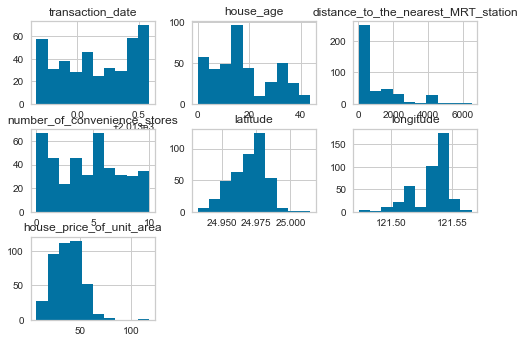

In [9]:
# VISUALIZATION

real_estate_price.hist() #select the plot type histogram
plt.show() # select to show the plot only not extra detail

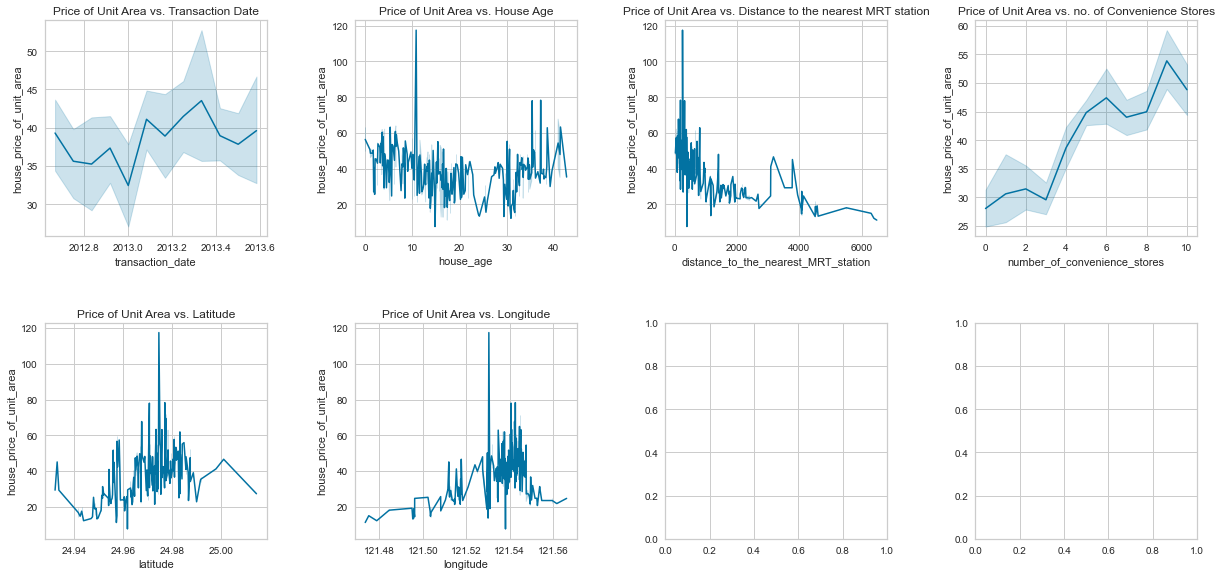

In [10]:
#subplots(no.of row, no.of column, figsize(width, length))
fig, ax = plt.subplots(2,4, figsize=(20,9))
# using ax.flatten() avoid defining it again and again for multiple iteration
ax = ax.flatten()

#Plot all columns against house price to analyze
sns.set()
sns.lineplot(data=train_data, x="transaction_date", y="house_price_of_unit_area", ax=ax[0])
# define the number in which plot you want to present above information
ax[0].set_title("Price of Unit Area vs. Transaction Date")

sns.lineplot(data=train_data, x="house_age", y="house_price_of_unit_area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. House Age")

sns.lineplot(data=train_data, x="distance_to_the_nearest_MRT_station", y="house_price_of_unit_area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=train_data, x="number_of_convenience_stores", y="house_price_of_unit_area", ax=ax[3])
ax[3].set_title("Price of Unit Area vs. no. of Convenience Stores")

sns.lineplot(data=train_data, x="latitude", y="house_price_of_unit_area", ax=ax[4])
ax[4].set_title("Price of Unit Area vs. Latitude")

sns.lineplot(data=train_data, x="longitude", y="house_price_of_unit_area", ax=ax[5])
ax[5].set_title("Price of Unit Area vs. Longitude")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show();

1. We can clearly see that the house price of unit area is proportional to the number of convenience stores. The more the number of convenience stores near the house, the the higher the price of the unit area.
2. Additionally, we can see that the closer the house is to the nearest MRT station, the higher the price of unit are is.
3. Unexpectedly, the house age is not proportional to the price of unit area, but we can see a pattern and an obvious outlier.
4. A pattern can be noticed in longitude and latitude, but we need to explore them more.

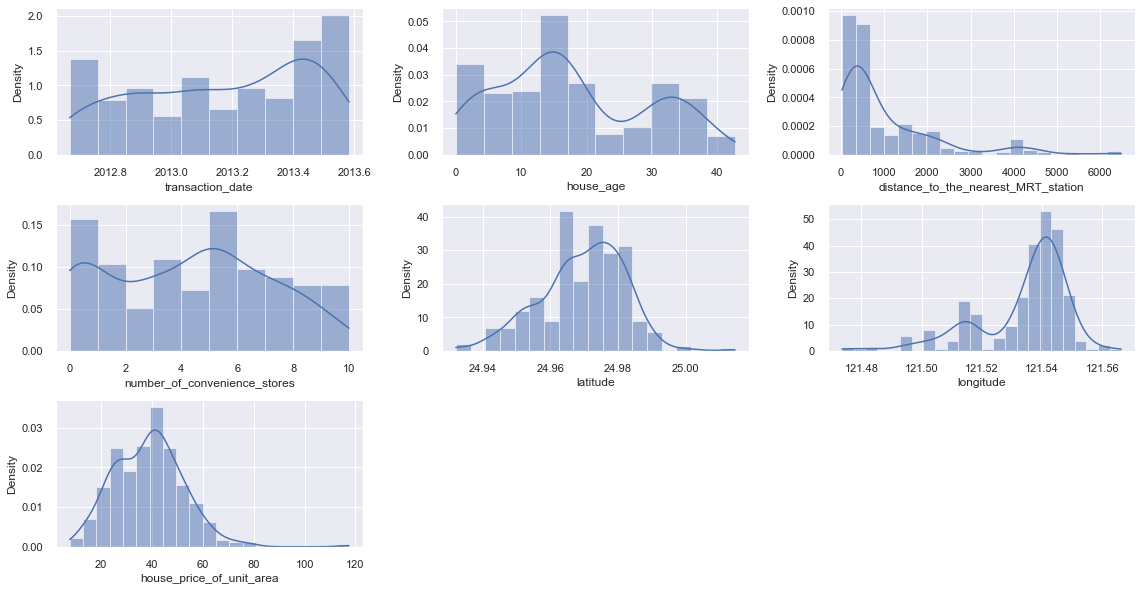

In [11]:
#Data Preparation
# let's take a look to the outliers using histogram or boxplot

# 1. Histogram
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.histplot(train_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

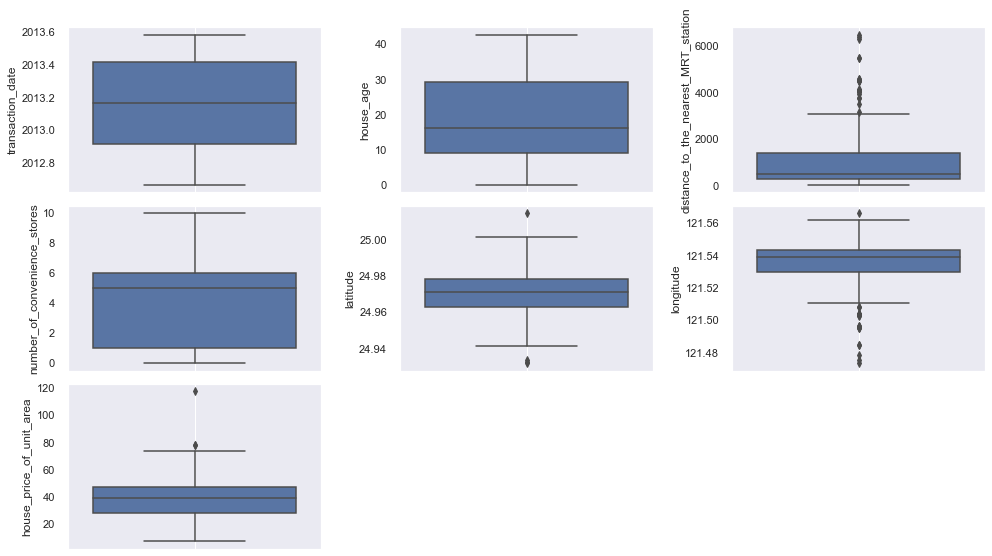

In [12]:
# Boxplot
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=train_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

We can see that there are obvious outliers in:¶
- house price of unit area
- longitude
- distance to the nearest MRT station

### Drop the outliers

In [13]:
train_data = train_data[train_data['house_price_of_unit_area']<80]
train_data = train_data[train_data['distance_to_the_nearest_MRT_station']<3000]
train_data = train_data[train_data['longitude']>121.50]

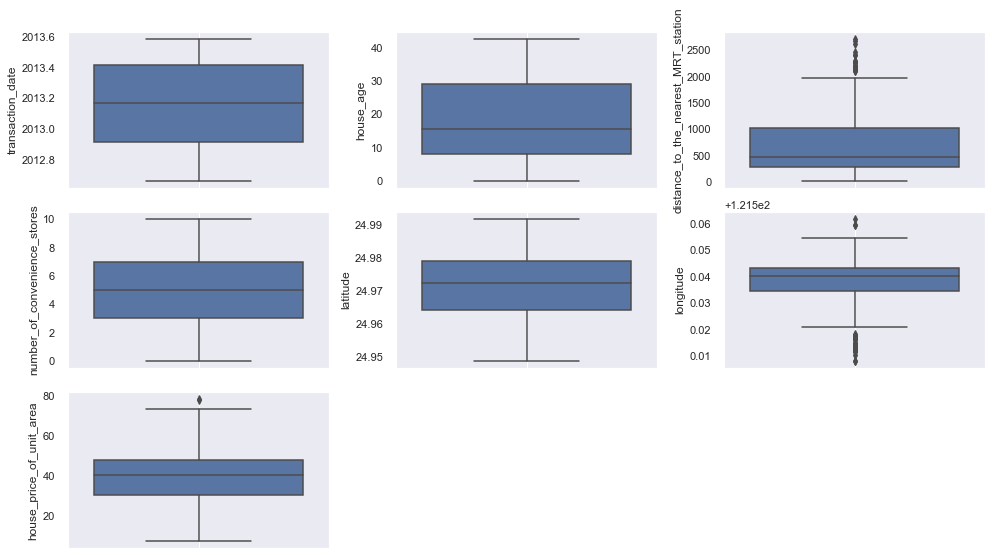

In [14]:
# Boxplot
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=train_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

Check the correlation

In [15]:
numeric_data = train_data
correlation = numeric_data.corr()
correlation[['house_price_of_unit_area']].sort_values(['house_price_of_unit_area'], ascending=False)

,house_price_of_unit_area
house_price_of_unit_area,1.000000
number_of_convenience_stores,0.549931
latitude,0.442652
longitude,0.358851
transaction_date,0.104169
house_age,-0.197057
distance_to_the_nearest_MRT_station,-0.684065


The number of convenience stores is moderately correlated to the price of unit area, while the distance to the nearest MRT station negatively correlated.

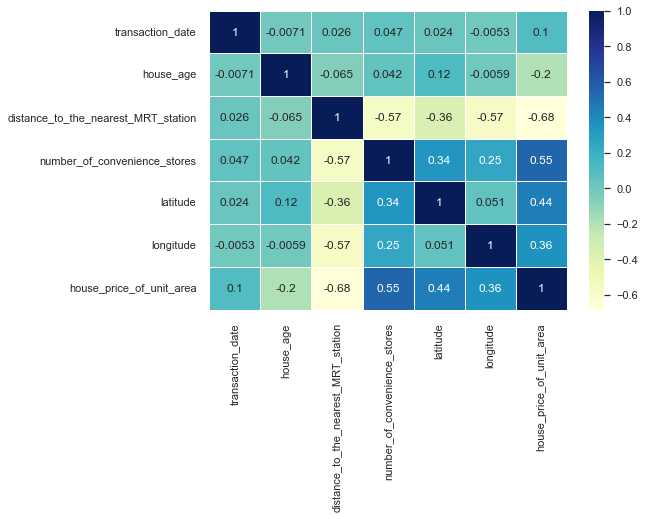

In [16]:
# correlation plot (heatmap)
corr = train_data.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot= True, linewidths=.5);

Apply Linear Regression Model

In [17]:
regression_model = LinearRegression()

house price vs convenience stores

In [18]:
# house price vs convenience stores
train_x = np.asanyarray(train_data[['house_price_of_unit_area']])
train_y = np.asanyarray(train_data[['number_of_convenience_stores']])
regression_model.fit(train_x, train_y)
print("coeff:", regression_model.coef_)
print("intercept:", regression_model.intercept_)

coeff: [[0.12472848]]
intercept: [-0.40708623]


Text(0, 0.5, 'convenience store')

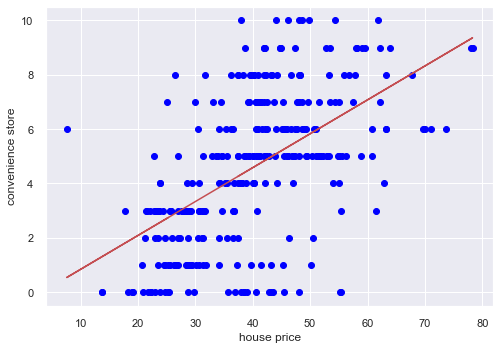

In [19]:
plt.scatter(train_data.house_price_of_unit_area, train_data.number_of_convenience_stores,  color='blue')
plt.plot(train_x, regression_model.coef_[0][0]*train_x + regression_model.intercept_[0], '-r')
plt.xlabel("house price")
plt.ylabel("convenience store")

In [20]:
test_x = np.asanyarray(test_data[['house_price_of_unit_area']])
test_y = np.asanyarray(test_data[['number_of_convenience_stores']])
predictons = regression_model.predict(test_x)
RMSE = np.sqrt(mean_squared_error(test_y, predictons))
print("MAE:", mean_absolute_error(test_y, predictons))
print("MSE:", mean_squared_error(test_y, predictons))
print("RMSE", np.sqrt(mean_squared_error(test_y, predictons)))

MAE: 1.938733318246066
MSE: 5.803955178642243
RMSE 2.4091399250857646


house price vs house age

In [21]:
# house price vs house age
train_x1 = np.asanyarray(train_data[['house_price_of_unit_area']])
train_y1 = np.asanyarray(train_data[['house_age']])
regression_model.fit(train_x1, train_y1)
print("coeff:", regression_model.coef_)
print("intercept:", regression_model.intercept_)

coeff: [[-0.19000418]]
intercept: [25.21516776]


Text(0, 0.5, 'house age')

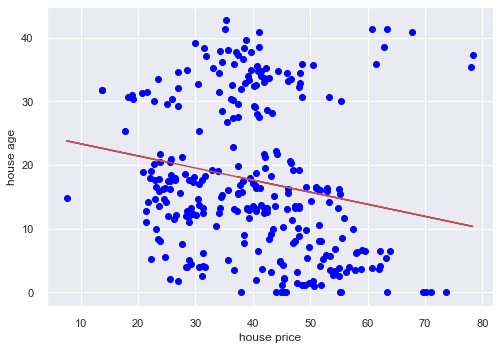

In [22]:
plt.scatter(train_data.house_price_of_unit_area, train_data.house_age,  color='blue')
plt.plot(train_x1, regression_model.coef_[0][0]*train_x1 + regression_model.intercept_[0], '-r')
plt.xlabel("house price")
plt.ylabel("house age")

In [23]:
test_x1 = np.asanyarray(test_data[['house_price_of_unit_area']])
test_y1 = np.asanyarray(test_data[['house_age']])
predictons1 = regression_model.predict(test_x1)
RMSE1 = np.sqrt(mean_squared_error(test_y1, predictons1))
print("MAE:", mean_absolute_error(test_y1, predictons1))
print("MSE:", mean_squared_error(test_y1, predictons1))
print("RMSE", np.sqrt(mean_squared_error(test_y1, predictons1)))

MAE: 8.944451854755041
MSE: 116.60910817163908
RMSE 10.798569728053762


House price vs distance to the nearest MRT station

In [24]:
train_x2 = np.asanyarray(train_data[['house_price_of_unit_area']])
train_y2 = np.asanyarray(train_data[['distance_to_the_nearest_MRT_station']])
regression_model.fit(train_x2, train_y2)
print("coeff:", regression_model.coef_)
print("intercept:", regression_model.intercept_)

coeff: [[-36.97973798]]
intercept: [2220.02272622]


Text(0, 0.5, 'distance to the nearest MRT station')

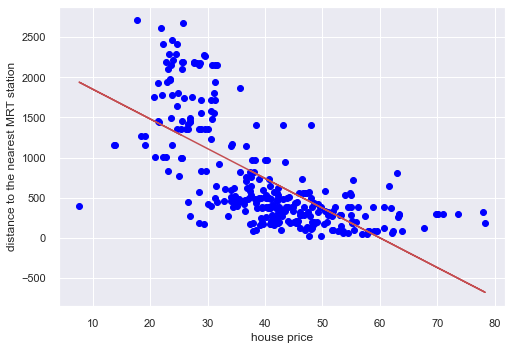

In [25]:
plt.scatter(train_data.house_price_of_unit_area, train_data.distance_to_the_nearest_MRT_station,  color='blue')
plt.plot(train_x2, regression_model.coef_[0][0]*train_x2 + regression_model.intercept_[0], '-r')
plt.xlabel("house price")
plt.ylabel("distance to the nearest MRT station")

In [27]:
test_x2 = np.asanyarray(test_data[['house_price_of_unit_area']])
test_y2 = np.asanyarray(test_data[['house_age']])
predictons2 = regression_model.predict(test_x2)
RMSE2 = np.sqrt(mean_squared_error(test_y2, predictons2))
print("MAE:", mean_absolute_error(test_y2, predictons2))
print("MSE:", mean_squared_error(test_y2, predictons2))
print("RMSE", np.sqrt(mean_squared_error(test_y2, predictons2)))

MAE: 906.2973978748494
MSE: 1026429.4964713303
RMSE 1013.1285685791959


House price vs transaction date

In [28]:
train_x3 = np.asanyarray(train_data[['house_price_of_unit_area']])
train_y3 = np.asanyarray(train_data[['transaction_date']])
regression_model.fit(train_x3, train_y3)
print("coeff:", regression_model.coef_)
print("intercept:", regression_model.intercept_)

coeff: [[0.00237799]]
intercept: [2013.06461942]


Text(0, 0.5, 'transaction date')

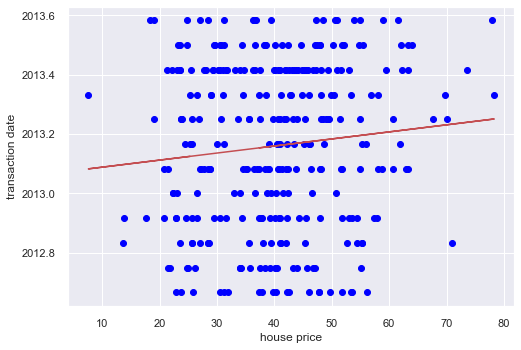

In [29]:
plt.scatter(train_data.house_price_of_unit_area, train_data.transaction_date,  color='blue')
plt.plot(train_x3, regression_model.coef_[0][0]*train_x3 + regression_model.intercept_[0], '-r')
plt.xlabel("house price")
plt.ylabel("transaction date")

In [30]:
test_x3 = np.asanyarray(test_data[['house_price_of_unit_area']])
test_y3 = np.asanyarray(test_data[['house_age']])
predictons3 = regression_model.predict(test_x3)
RMSE3 = np.sqrt(mean_squared_error(test_y3, predictons3))
print("MAE:", mean_absolute_error(test_y3, predictons3))
print("MSE:", mean_squared_error(test_y3, predictons3))
print("RMSE", np.sqrt(mean_squared_error(test_y3, predictons3)))

MAE: 1995.838348044504
MSE: 3983493.8775520944
RMSE 1995.86920351813


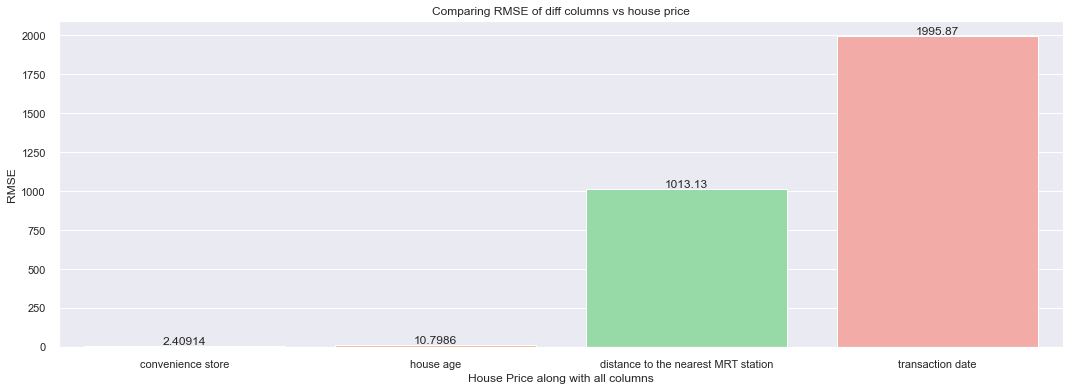

In [35]:
sns.set()
plt.figure(figsize=(18,6))
All_RMSE = [RMSE, RMSE1, RMSE2, RMSE3]
House_Price_VS_Column = ['convenience store', 'house age', 'distance to the nearest MRT station', 'transaction date']
ax = sns.barplot(x = House_Price_VS_Column, y = All_RMSE, palette = 'pastel')
ax.bar_label(ax.containers[0])
plt.xlabel('House Price along with all columns')
plt.ylabel('RMSE')
plt.title('Comparing RMSE of diff columns vs house price');

RMSE tells us the average distance between the predicted values from the model and the actual values in the dataset. The lower the RMSE, the better a given model is able to “fit” a dataset. As you can see, the RMSE is getting worse for house price with transaction date. And It is the best at house price vs convenience store. Conclusion is "The house price are more when there is convenience store. It is also depend on house age as well but transaction date and distance to the MRT station doesn't impact much to house prices.